In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig 

In [2]:
# define a sample data

marks = np.array([[2,3],[6,4],[4,9],[5,6]])
print(marks)

[[2 3]
 [6 4]
 [4 9]
 [5 6]]


In [3]:
marks_df = pd.DataFrame(marks,columns=["DS","Python"])
marks_df

,DS,Python
0,2,3
1,6,4
2,4,9
3,5,6


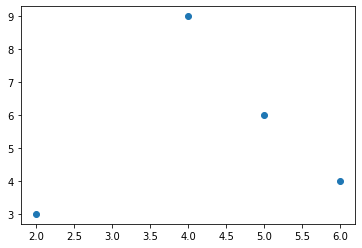

In [4]:
plt.scatter(marks_df["DS"],marks_df["Python"])

In [5]:
# making data mean centric

meanbycolumn = np.mean(marks.T,axis=1)
print(meanbycolumn)

scaled_data = marks - meanbycolumn


[4.25 5.5 ]


In [6]:
marks.T

array([[2, 6, 4, 5],
       [3, 4, 9, 6]])

In [7]:
print(scaled_data)

[[-2.25 -2.5 ]
 [ 1.75 -1.5 ]
 [-0.25  3.5 ]
 [ 0.75  0.5 ]]


In [8]:
# find covariance matrix of above scaled data

cov_matrix = np.cov(scaled_data.T)
cov_matrix

array([[2.91666667, 0.83333333],
       [0.83333333, 7.        ]])

In [9]:
# find the corresponding eigen value and eigen vectors of above covariance matrix

Eval,Evec = eig(cov_matrix)
print(Eval)
print("\n")
print(Evec)

[2.7531469  7.16351977]


[[-0.98128682 -0.19255175]
 [ 0.19255175 -0.98128682]]


In [10]:
Evec.T.shape

(2, 2)

In [11]:
scaled_data.T.shape

(2, 4)

In [12]:
# get original data projected to principal components as new axis

projected_data = Evec.T.dot(scaled_data.T)
print(projected_data.T)

[[ 1.72651596  2.8864585 ]
 [-2.00607957  1.13496466]
 [ 0.91925285 -3.38636593]
 [-0.63968924 -0.63505723]]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(marks)


array([[-2.8864585 , -1.72651596],
       [-1.13496466,  2.00607957],
       [ 3.38636593, -0.91925285],
       [ 0.63505723,  0.63968924]])

In [14]:
# variance explained ratio by each PC

pca.explained_variance_ratio_

array([0.72237174, 0.27762826])

In [15]:
# dataframe for PC

pc_df = pd.DataFrame(data = pca.fit_transform(marks),columns=['PC1','PC2']) 
pc_df

,PC1,PC2
0,-2.886458,-1.726516
1,-1.134965,2.006080
2,3.386366,-0.919253
3,0.635057,0.639689


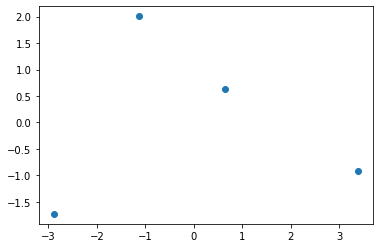

In [17]:
plt.scatter(pc_df["PC1"],pc_df["PC2"])

In [18]:
# inverse transform

pca.inverse_transform(pca.fit_transform(marks))

array([[2., 3.],
       [6., 4.],
       [4., 9.],
       [5., 6.]])

In [20]:
# how much weight each variable has in principal components
laodings= pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=["DS","Python"])
laodings

,PC1,PC2
DS,0.192552,0.981287
Python,0.981287,-0.192552
